In [1]:
### Step 1: Load Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Load dataset
df = pd.read_csv(r'C:\Users\Dell\Documents\alzheimers_disease_data.csv')
print("Dataset loaded. Shape:", df.shape)

# Display basic info
print(df.shape)
print(df.info())
print(df.describe())

Dataset loaded. Shape: (2149, 35)
(2149, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Dia

In [7]:
### Step 2: Handle Missing Values and Duplicates
print("\nMissing values per column before filling:")
print(df.isnull().sum())

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

df.drop_duplicates(inplace=True)
print("\nAfter removing duplicates, new shape:", df.shape)


Missing values per column before filling:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges         

In [9]:
### Step 3: Encode Categorical Variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Diagnosis':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

print("\nData types after encoding:")
print(df.dtypes)


Data types after encoding:
PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
Behavioral

In [11]:
### Step 4: Feature Scaling
scaler = StandardScaler()
X = df.drop(['Diagnosis', 'DoctorInCharge', 'PatientID'], axis=1)
X_scaled = scaler.fit_transform(X)
y = df['Diagnosis']

In [45]:
### Step 5: Feature Selection using RFE
model_rf = RandomForestClassifier(random_state=42)
rfe = RFE(model_rf, n_features_to_select=10)
rfe.fit(X_scaled, y)
selected_features = X.columns[rfe.support_]
print("\nTop 10 Selected Features:")
print(selected_features)



Top 10 Selected Features:
Index(['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL'],
      dtype='object')



Class Distribution in Diagnosis:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


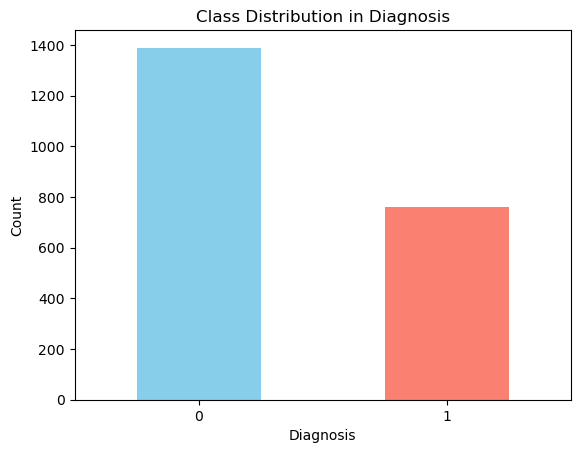

In [47]:
### Step X: Check for Class Imbalance
print("\nClass Distribution in Diagnosis:")
print(y.value_counts())

# Visualize class distribution
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Class Distribution After SMOTE:
Diagnosis
0    1389
1    1389
Name: count, dtype: int64


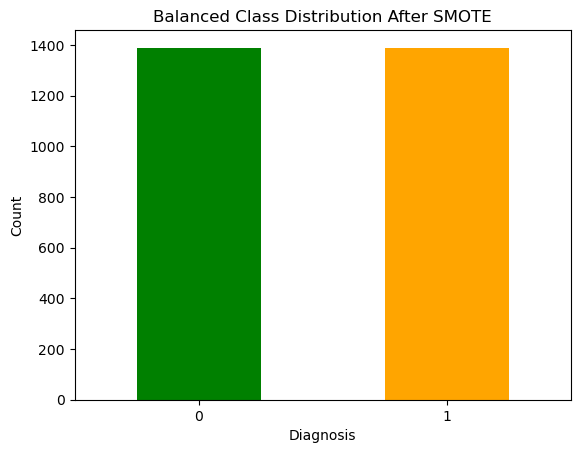

In [49]:
### Step X+1: Apply SMOTE to Balance the Dataset
from imblearn.over_sampling import SMOTE

X_selected = df[selected_features]
y = df['Diagnosis']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

print("\nClass Distribution After SMOTE:")
print(y_resampled.value_counts())

# Visualize post-SMOTE
y_resampled.value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title('Balanced Class Distribution After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Step X+2: Train-Test Split on Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [123]:
from sklearn.model_selection import train_test_split

# Assume you have already done SMOTE and feature selection
# X_resampled: your feature matrix after SMOTE (balanced)
# y_resampled: your target column after SMOTE
# selected_features: the features you selected using RFE

# Split the balanced data (after SMOTE and feature selection)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled[selected_features], 
    y_resampled, 
    test_size=0.3, 
    random_state=42,
    stratify=y_resampled  # ensures class proportions are preserved in train/test
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1944, 10)
Testing set shape: (834, 10)


In [125]:
### Step 7: Model Training and Evaluation

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("\nLogistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("\nSVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_pred))

# Determine the best model
accuracies = {'RandomForest': rf_acc, 'LogisticRegression': lr_acc, 'SVM': svm_acc}
best_model_name = max(accuracies, key=accuracies.get)
print("\nBest performing model:", best_model_name, "with accuracy:", accuracies[best_model_name])


Random Forest Accuracy: 0.9052757793764988
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       417
           1       0.94      0.86      0.90       417

    accuracy                           0.91       834
   macro avg       0.91      0.91      0.91       834
weighted avg       0.91      0.91      0.91       834


Logistic Regression Accuracy: 0.7997601918465228
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       417
           1       0.78      0.83      0.81       417

    accuracy                           0.80       834
   macro avg       0.80      0.80      0.80       834
weighted avg       0.80      0.80      0.80       834


SVM Accuracy: 0.7961630695443646
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       417
           1       0.78      0.83      0.80       417

    accuracy                           0.80       834


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Use selected features from RFE
features = selected_features

# Scale data again based on selected features
scaler = StandardScaler()
scaler.fit(X_train[features])
X_train_scaled = scaler.transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

# Train Random Forest with class_weight to handle imbalance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['Nondemented', 'Demented']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

 Nondemented       0.87      0.95      0.91       417
    Demented       0.94      0.86      0.90       417

    accuracy                           0.91       834
   macro avg       0.91      0.91      0.91       834
weighted avg       0.91      0.91      0.91       834

Confusion Matrix:
[[396  21]
 [ 58 359]]


 AUC Score: 0.9470


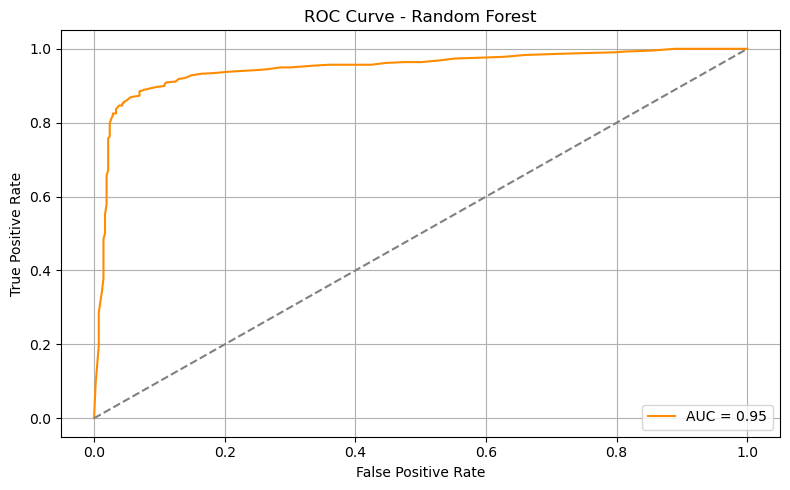

In [127]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = rf.predict_proba(X_test_scaled)[:, 1]  # Demented probability

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f" AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8300\1604641752.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


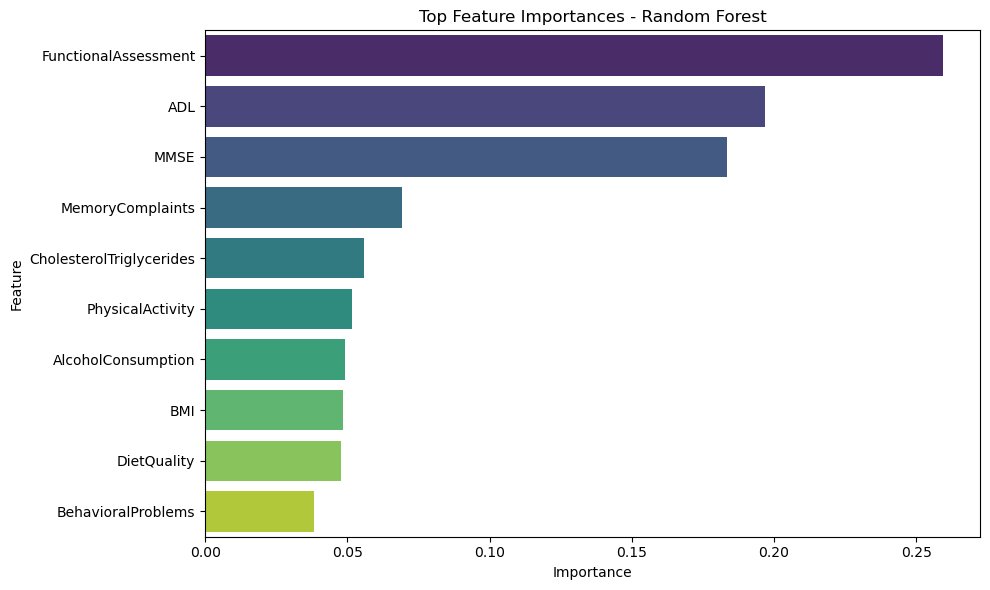

In [128]:
### Step 8: Visualize Feature Importances (from best model if Random Forest)
if best_model_name == 'RandomForest':
    importances = rf.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Top Feature Importances - Random Forest')
    plt.tight_layout()
    plt.show()


Confusion Matrix - Random Forest


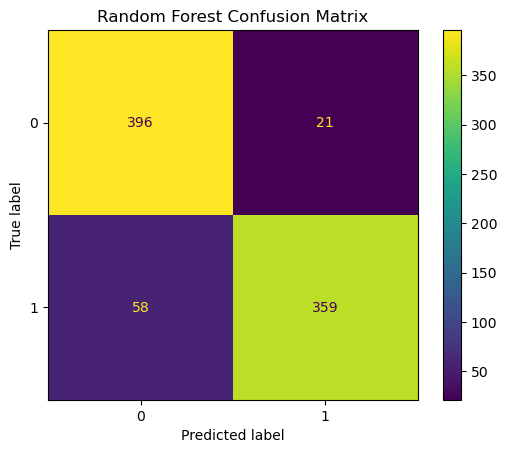


Confusion Matrix - Logistic Regression


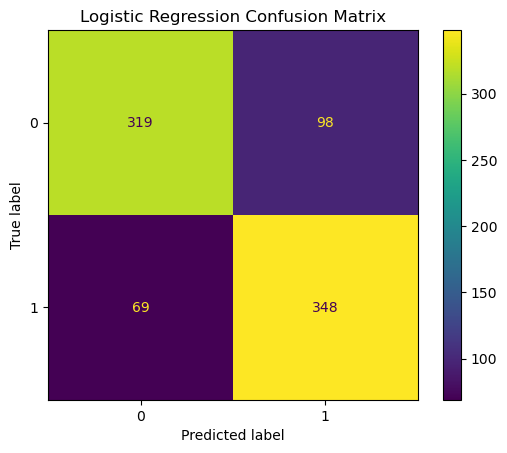


Confusion Matrix - SVM


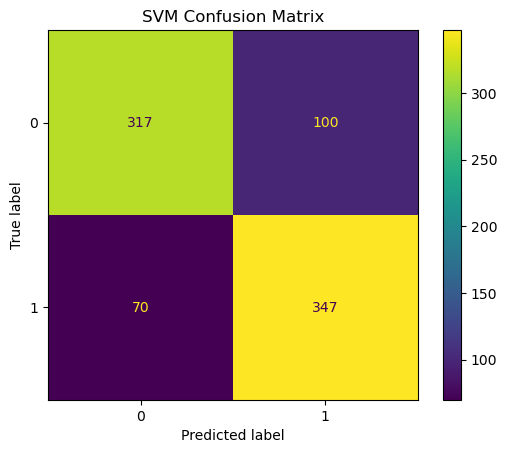

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Random Forest
print("\nConfusion Matrix - Random Forest")
cm_rf = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion Matrix for Logistic Regression
print("\nConfusion Matrix - Logistic Regression")
cm_lr = confusion_matrix(y_test, lr_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for SVM
print("\nConfusion Matrix - SVM")
cm_svm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot()
plt.title("SVM Confusion Matrix")
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.9084382370869001

Accuracy with Tuned Model: 0.9100719424460432
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       417
           1       0.94      0.87      0.91       417

    accuracy                           0.91       834
   macro avg       0.91      0.91      0.91       834
weighted avg       0.91      0.91      0.91       834



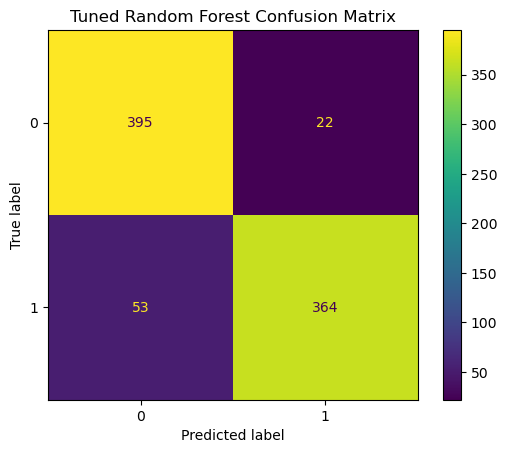

In [135]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create base model
rf_base = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Use best estimator to predict on test data
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)

# Evaluation
print("\nAccuracy with Tuned Model:", accuracy_score(y_test, best_rf_pred))
print(classification_report(y_test, best_rf_pred))

# Confusion matrix for tuned model
from sklearn.metrics import ConfusionMatrixDisplay
cm_best_rf = confusion_matrix(y_test, best_rf_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_best_rf).plot()
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()


Top Important Features:
                     Feature  Importance
6      FunctionalAssessment    0.279965
9                       ADL    0.205984
5                      MMSE    0.199339
7          MemoryComplaints    0.078843
4  CholesterolTriglycerides    0.045059
8        BehavioralProblems    0.043027
1        AlcoholConsumption    0.039503
2          PhysicalActivity    0.037337
3               DietQuality    0.035909
0                       BMI    0.035034


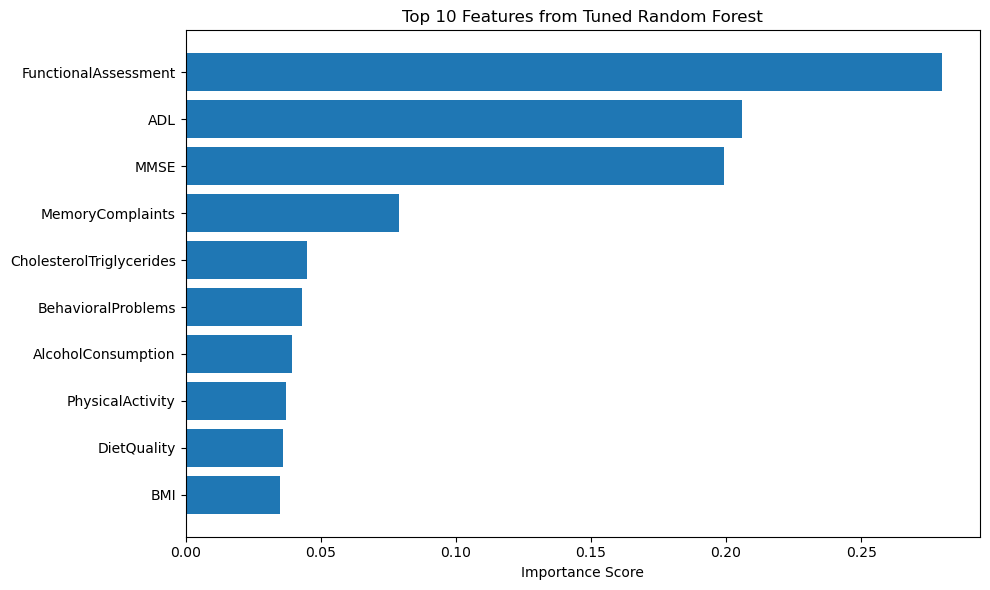

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the tuned Random Forest model
importances = best_rf.feature_importances_   # best_rf = your tuned model
feature_names = X_train.columns              # Replace with your training feature names

# Create a DataFrame for better readability
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Important Features:\n", feat_importance_df)

# Optional: Visualize
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'][:10], feat_importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Features from Tuned Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [118]:
# Example patient (healthy)
sample = pd.DataFrame([{
    'BMI': 22.0,
    'AlcoholConsumption': 0,
    'PhysicalActivity': 5,
    'DietQuality': 8,
    'CholesterolTriglycerides': 150,
    'MMSE': 29,
    'FunctionalAssessment': 1,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 1
}])

sample_scaled = scaler.transform(sample[features])
proba = rf.predict_proba(sample_scaled)[0]
pred = rf.predict(sample_scaled)[0]

print(f" Prediction: {pred} | {' CORRECT' if pred == 0 else ' INCORRECT (Should be Nondemented)'}")
print(f" Demented: {proba[1]*100:.2f}%, Nondemented: {proba[0]*100:.2f}%")


 Prediction: 0 |  CORRECT
 Demented: 10.00%, Nondemented: 90.00%
